# kaggle --Digit Recognizer
**Reference: https://blog.csdn.net/danspace1/article/details/80631630**

**Result: 0.98482**

## Summary
**Main Techniques**
- pca & svm


**Packages**
- numpy, pandas, matplotlib.pyplot
- sklearn.preprocessing : MinMaxScaler  ——归一化
- sklearn.model_selection : train_test_split  ——训练数据集划分
- sklearn.decomposition : PCA  ——主成分分析（PCA）降维
- sklearn : svm : svm.SVC()  ——支持向量机模型
- sklearn.model_selection : GridSearchCV  ——网格搜索（GridSerach..）+交叉验证（..CV），调参


## 1. 基本处理

#### 基本的库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 读入数据

In [2]:
# 训练数据
train_data = pd.read_csv("train.csv")
# 测试数据
test_data = pd.read_csv("test.csv")

#### 查看数据基本内容

In [3]:
train_data.info()
train_data.isnull().any().describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


count       785
unique        1
top       False
freq        785
dtype: object

In [4]:
test_data.info()
test_data.isnull().any().describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


count       784
unique        1
top       False
freq        784
dtype: object

#### 数据拆分

In [9]:
# 数据拆分
X = train_data.iloc[:, 1:]
y = train_data.iloc[:, 0]

#### 看数字的pixel图

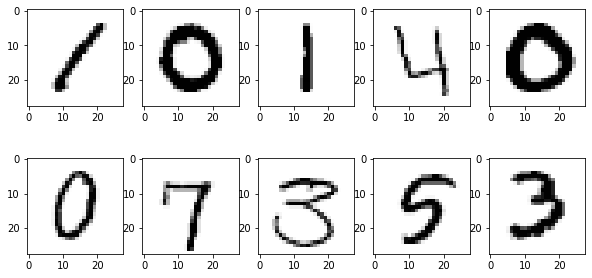

In [10]:
plt.figure(figsize=(10,5))

for num in range(10):
    plt.subplot(2,5,num+1)
    grid = X.iloc[num].values.reshape(28,28)
    plt.imshow(grid, cmap='Greys')

#### 归一化

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
# 归一化
X = MinMaxScaler().fit_transform(X)
test_data = MinMaxScaler().fit_transform(test_data)

#### train_data划分训练集、测试集

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=14)

## 2. PCA降维

In [19]:
from sklearn.decomposition import PCA
from sklearn import svm

#### 验证需要降到多少维

In [22]:
# 各维数据的准确率集合
all_accuracy = []
# 测试的维数
n_comp = np.linspace(0.7, 0.9, num=20, endpoint=False)

def get_accuracy(n, Xtrain, Xtest, ytrain, ytest):
    # 数据喂进pca
    pca = PCA(n_components=n)
    pca.fit(Xtrain)
    # 转换维度
    Xtrain_pca = pca.transform(Xtrain)
    Xtest_pca = pca.transform(Xtest)
    # svm分类
    cls = svm.SVC()
    cls.fit(Xtrain_pca, ytrain)
    # 准确度
    accuracy = cls.score(Xtest_pca, ytest)
    print(accuracy, n)
    return accuracy
    
for n in n_comp:
    acc = get_accuracy(n, X_train, X_test, y_train, y_test)
    all_accuracy.append(acc)
    

0.9728571428571429 0.7
0.974047619047619 0.71
0.9747619047619047 0.72
0.9745238095238096 0.73
0.9761904761904762 0.74
0.9761904761904762 0.75
0.9766666666666667 0.76
0.9764285714285714 0.77
0.9780952380952381 0.78
0.9776190476190476 0.79
0.9778571428571429 0.8
0.9776190476190476 0.81
0.9778571428571429 0.8200000000000001
0.9778571428571429 0.8300000000000001
0.9788095238095238 0.84
0.9785714285714285 0.85
0.9788095238095238 0.86
0.9783333333333334 0.87
0.9776190476190476 0.88
0.9780952380952381 0.89


#### 选择0.86进行降维

In [24]:
pca = PCA(n_components=0.86)
pca.fit(X)

X = pca.transform(X)
test_data = pca.transform(test_data)

#### 调参

In [25]:
from sklearn.model_selection import GridSearchCV

In [27]:
cls_svc = GridSearchCV(estimator=svm.SVC(), param_grid={'C':[1,2,4,5], 'kernel':['linear','sigmoid','rbf']}, cv=5, verbose=2)
cls_svc.fit(X,y)

# 预测
preds = cls_svc.predict(test_data)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=1, kernel=linear, total= 1.1min
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV] ............................... C=1, kernel=linear, total=  49.5s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=  23.0s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=  23.7s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=  23.3s
[CV] C=1, kernel=sigmoid .............................................
[CV] .............................. C=1, kernel=sigmoid, total=  26.9s
[CV] C=1, kernel=sigmoid .............................................
[CV] .............................. C=1, kernel=sigmoid, total=  26.7s
[CV] C=1, kernel=sigmoid .............................................
[CV] .............................. C=1, kernel=sigmoid, total=  27.0s
[CV] C=1, kernel=sigmoid .............................................
[CV] .

[CV] .................................. C=5, kernel=rbf, total=  26.3s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 57.4min finished


AttributeError: module 'pandas' has no attribute 'Seried'

**SVM Conclusion**

1. 调参 -- GridSearchCV
2. 训练 -- model.fit(X,y)
3. 预测 -- model.predict(test)

**PCA Conclusion**
1. 选参数 -- n_componets...
2. 训练 -- pca.fit(X)
3. 转换X -- X_pca=pca.transform(X)

**GridSearchCV**
- cv=5: 使用5折交叉验证（默认为3折，一般3/5/10）
- estimator=svm.SVC(): 使用SVC分类器
- verbose: 日志冗长度
- para_grid: 需要最优化的参数，为字典或列表


**Recap**
- C：越大越容易过拟合；越小允许误差
- // ps. lambda：越小越容易过拟合；越大允许误差
- kernel：核函数（linear, sigmoid, rbf, ...）  # rbf就是gaussian核函数 --RBF(Radial basis function kernel高斯径向基函数)

In [35]:
image_id = pd.Series(range(1, len(preds)+1))
res = pd.DataFrame({'ImageID':image_id, 'Label':preds})
# 保存
res.to_csv("final_pca&svm.csv", index=False)
print('Done')

Done


## 验证

#### fff.csv

In [36]:
final_res = pd.read_csv("final_pca&svm.csv")
final_res.head(10)

,ImageID,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


#### test.csv

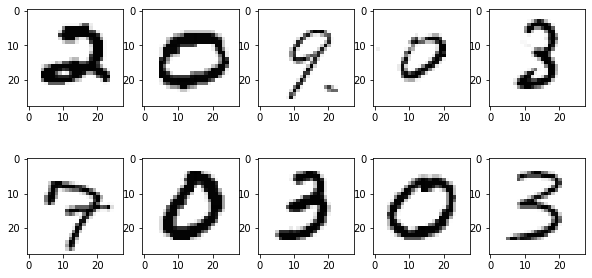

In [31]:
test = pd.read_csv("test.csv")

plt.figure(figsize=(10,5))
for num in range(10):
    plt.subplot(2,5,num+1)
    grid = test.iloc[num].values.reshape(28,28)
    plt.imshow(grid, cmap='Greys')